# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4: Web Scraping Job Postings

## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

---

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

---

## Requirements

1. Scrape and prepare your own data.

2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
   - Section 1: Job Salary Trends
   - Section 2: Job Category Factors

3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
   - Make sure to clearly describe and label each section.
   - Comment on your code so that others could, in theory, replicate your work.

4. A brief writeup in an executive summary, written for a non-technical audience.
   - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

#### BONUS

5. Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions.

6. Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

---

## Suggestions for Getting Started

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
5. If tackling the bonus question, try framing the salary problem as a classification problem detecting low vs. high salary positions.

---

## Useful Resources

- Scraping is one of the most fun, useful and interesting skills out there. Don’t lose out by copying someone else's code!
- [Here is some advice on how to write for a non-technical audience](http://programmers.stackexchange.com/questions/11523/explaining-technical-things-to-non-technical-people)
- [Documentation for BeautifulSoup can be found here](http://www.crummy.com/software/BeautifulSoup/).

---

### Project Feedback + Evaluation

For all projects, students will be evaluated on a simple 3 point scale (0, 1, or 2). Instructors will use this rubric when scoring student performance on each of the core project **requirements:** 

Score | Expectations
----- | ------------
**0** | _Does not meet expectations. Try again._
**1** | _Meets expectations. Good job._
**2** | _Surpasses expectations. Brilliant!_

[For more information on how we grade our DSI projects, see our project grading walkthrough.](https://git.generalassemb.ly/dsi-projects/readme/blob/master/README.md)


In [1]:
# Import scraping libraries
from bs4 import BeautifulSoup
import requests
import urllib
import os
from selenium import webdriver
from time import sleep
import pickle

In [2]:
# Import standard libraries
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

## 1.1. Scraping Mycareersfuture.com

**Building the Scraper**

In [3]:
import random

def get_links(search='', page_start=0, page_end=0):
    # Set path from cromedriver
    chromedriver = "/Users/samdarmali/Desktop/GA/materials-duplicate/projects/project-4/chromedriver/chromedriver"
    os.environ["webdriver.chrome.driver"] = chromedriver

    # Create a driver called "driver."
    driver = webdriver.Chrome(executable_path=chromedriver)
    
    # Dictionary of links to keep
    links = []
    
    # Ask user for first url and number of pages
    url_frag = search.replace(' ','%20')
    
    count = 250
    
    for page in range(int(page_start), int(page_end)):
        # Use url
        url = 'https://www.mycareersfuture.sg/search?search={}&sortBy=new_posting_date&page={}'.format(url_frag, page)
        print('Getting links from {} ...'.format(url))
        
        # Get page and wait 3 to 6 seconds
        driver.get(url)
        sleep(random.randint(3,6))

        # Get the html and convert to beautiful soup
        html = driver.page_source
        soup = BeautifulSoup(html, 'lxml')
        
        for i in soup.find_all('a', {'class':'bg-white'}):
            
            # Get link for each post, if job link then scrape it, if not then continue
            post_link = i.get('href')
            
            # Complete url
            if post_link.startswith('/job/'):
                post_link = 'https://www.mycareersfuture.sg' + post_link
                links.append(post_link)
            
            # Save to new txt file every 250 links
            if len(links) % 250 == 0:
                with open('mycareersfuture_links{}.txt'.format(count), 'wb') as fp:
                    pickle.dump(links, fp)
                print('First {} links stored in temporary txt file ...'.format(count))
                count += 250
        
        print('----\nLinks from page {} received\n-----'.format(page))
    
    # Close driver
    driver.close()
    
    return links

In [4]:
def mycareersfuture_scraper():
    # Set path from cromedriver
    chromedriver = "/Users/samdarmali/Desktop/GA/materials-duplicate/projects/project-4/chromedriver/chromedriver"
    os.environ["webdriver.chrome.driver"] = chromedriver

    # Create a driver called "driver."
    driver = webdriver.Chrome(executable_path=chromedriver)
    
    # Dictionary of information to keep
    details = {'title': [],
               'company': [],
               'description': [],
               'company_overview': [],
               'location': [],
               'role': [],
               'hours': [],
               'industry': [],
               'applications': [],
               'posted': [],
               'closing': [],
               'salary_type': [],
               'salary': []}
    
    # Ask user for first url and number of pages
    search = input('Search: ')
    url_frag = search.replace(' ','%20')
    page_start = input('Page Start: ')
    page_end = input('Page End: ')
    
    # Get the links for search and pages parameters
    links = get_links(search=search, page_start=page_start, page_end=page_end)
    
    # Counter for csv file name
    count = 250
    
    for link in links:
        print('Scraping {} ...'.format(link))
        
        # Go to post page
        driver.get(link)
        sleep(random.randint(3,6))
        post_html = driver.page_source
        post_soup = BeautifulSoup(post_html, 'lxml')

        # Get title
        if not post_soup.find_all('h1', {'id':'job_title'}):
            details['title'].append(None)
        for title in post_soup.find_all('h1', {'id':'job_title'}):
            details['title'].append(title.text)

        # Get company
        if not post_soup.find_all('p',  {'name':'company'}):
            details['company'].append(None)
        for company in post_soup.find_all('p', {'name':'company'}):
            details['company'].append(company.text)

        # Get description
        if not post_soup.find_all('div', {'class':'jobDescription'}):
            details['description'].append(None)
        for desc in post_soup.find_all('div', {'class':'jobDescription'}):
            details['description'].append(desc.text)

        # Get company overview
        xpath = '//*[@id="job_details"]/div[2]/div[1]/div/div/section/section/div[2]/div/div[1]'
        try:
            details['company_overview'].append(driver.find_element_by_xpath(xpath).text)   
        except:
            details['company_overview'].append(None)
        
        # Get location
        if not post_soup.find_all('p', {'id':'address'}):
            details['location'].append(None)
        for loc in post_soup.find_all('p', {'id':'address'}):
            details['location'].append(loc.text)

        # Get role
        if not post_soup.find_all('p', {'id':'seniority'}):
            details['role'].append(None)
        for role in post_soup.find_all('p', {'id':'seniority'}):
            details['role'].append(role.text)

        # Get hours
        if not post_soup.find_all('p', {'id':'employment_type'}):
            details['hours'].append(None)
        for hours in post_soup.find_all('p', {'id':'employment_type'}):
            details['hours'].append(hours.text)

        # Get industry
        if not post_soup.find_all('p', {'id':'job-categories'}):
            details['industry'].append(None)
        for ind in post_soup.find_all('p', {'id':'job-categories'}):
            details['industry'].append(ind.text)

        # Get applications
        if not post_soup.find_all('span', {'id':'num_of_applications'}):
            details['applications'].append(None)
        for apps in post_soup.find_all('span', {'id':'num_of_applications'}):
            details['applications'].append(apps.text)

        # Get posted
        if not post_soup.find_all('span', {'id':'last_posted_date'}):
            details['posted'].append(None)
        for posted in post_soup.find_all('span', {'id':'last_posted_date'}):
            details['posted'].append(posted.text)

        # Get closing
        if not post_soup.find_all('span', {'id':'expiry_date'}):
            details['closing'].append(None)
        for closing in post_soup.find_all('span', {'id':'expiry_date'}):
            details['closing'].append(closing.text)
            
        # Get salary type
        if not post_soup.find_all('span', {'class':'salary_type'}):
            details['salary_type'].append(None)
        for sal in post_soup.find_all('span', {'class':'salary_type'}):
            details['salary_type'].append(sal.text.replace('to','-'))

        # Get salary
        if not post_soup.find_all('span', {'class':'salary_range'}):
            details['salary'].append(None)
        for sal in post_soup.find_all('span', {'class':'salary_range'}):
            details['salary'].append(sal.text.replace('to','-'))

        print('---')
        
        # Safeguard, save every 250 scraped job postings into a temporary df
        if len(details['title']) % 250 == 0:
            temp_df = pd.DataFrame(details)
            temp_df.to_csv('temp_df{}.csv'.format(count))
            print('First {} postings stored in temporary dataframe ...'.format(count))
            count += 250

    # Close driver
    driver.close()
    
    try:
        details_df = pd.DataFrame(details)
        print('Dataframe created!')
    except:
        print('')
        print('error: arrays must all be same length')
        print('length title:', len(details['title']))
        print('length company:', len(details['company']))
        print('length description:', len(details['description']))
        print('length company_overview:', len(details['company_overview']))
        print('length location:', len(details['location']))
        print('length role:', len(details['role']))
        print('length hours:', len(details['hours']))
        print('length industry:', len(details['industry']))
        print('length applications:', len(details['applications']))
        print('length posted:', len(details['posted']))
        print('length closing:', len(details['closing']))
        print('length salary_type:', len(details['salary_type']))
        print('length salary:', len(details['salary']))

    return details_df, links


## 1.2. Loading and Cleaning the Data

In [5]:
# Load data from several sources
pg_0_40 = pd.read_csv('driver_1/data_0-40.csv')
pg_40_80 = pd.read_csv('driver_2/data_40-80.csv')
pg_80_120 = pd.read_csv('driver_3/data_80-120.csv')
pg_120_160 = pd.read_csv('driver_4/data_120-160.csv')
pg_160_200 = pd.read_csv('driver_5/data_160-200.csv')


In [6]:
print(pg_0_40.shape)
print(pg_40_80.shape)
print(pg_80_120.shape)
print(pg_120_160.shape)
print(pg_160_200.shape)
print(pg_0_40.shape[0] + pg_40_80.shape[0] + pg_80_120.shape[0] + pg_120_160.shape[0] + pg_160_200.shape[0])

(700, 14)
(720, 14)
(620, 14)
(640, 14)
(660, 14)
3340


In [7]:
# Merge all dataframes together
pg_0_80 = pd.merge(pg_0_40, pg_40_80, 'outer')
pg_0_120 = pd.merge(pg_0_80, pg_80_120, 'outer')
pg_0_160 = pd.merge(pg_0_120, pg_120_160, 'outer')
pg_0_200 = pd.merge(pg_0_160, pg_160_200, 'outer')

In [8]:
pg_0_200.drop_duplicates(inplace=True)
pg_0_200.drop(columns='Unnamed: 0', inplace=True)
print(pg_0_200.shape)
pg_0_200.info()

(3336, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3336 entries, 0 to 3335
Data columns (total 13 columns):
title               3319 non-null object
company             3319 non-null object
description         3319 non-null object
company_overview    2922 non-null object
location            2533 non-null object
role                3267 non-null object
hours               3319 non-null object
industry            3319 non-null object
applications        3319 non-null object
posted              3319 non-null object
closing             3319 non-null object
salary_type         2974 non-null object
salary              3319 non-null object
dtypes: object(13)
memory usage: 364.9+ KB


In [9]:
# Get rid of the 1 rows that are just filled with null values
pg_0_200 = pg_0_200[pg_0_200['title'].isna()==False].copy()

# Clean applications
pg_0_200['applications'] = pg_0_200['applications'].apply(lambda x: float(x.strip('applications')))

# Clean posted dates and closing dates
pg_0_200['posted'] = pg_0_200['posted'].apply(lambda x: x.strip('Posted '))
pg_0_200['closing'] = pg_0_200['closing'].apply(lambda x: x.strip('Closing on '))

# Clean salaries
pg_0_200.drop(pg_0_200[pg_0_200['salary']=='Salary undisclosed'].index, inplace=True)
pg_0_200['salary'] = pg_0_200['salary'].apply(lambda x: x.replace('$','').replace(',',''))
pg_0_200['salary_low'] = pg_0_200['salary'].apply(lambda x: float(x.split('-')[0]))
pg_0_200['salary_high'] = pg_0_200['salary'].apply(lambda x: float(x.split('-')[1]))
pg_0_200['salary_mean'] = (pg_0_200['salary_low'] + pg_0_200['salary_high'])/2

# Make title column into string to see if it is a data related job or not
pg_0_200['title'] = pg_0_200['title'].astype('str')
pg_0_200['is_data_title'] = pg_0_200['title'].apply(lambda x: 1 if 'data' in x.lower().split(' ') else 0)

# Make description column into string to see if it is a data related job or not
pg_0_200['description'] = pg_0_200['description'].astype('str')
pg_0_200['is_data_desc'] = pg_0_200['description'].apply(lambda x: 1 if 'data' in x.lower().split(' ') else 0)

# Fill missing locations with 'None'
pg_0_200['location'].fillna('None', inplace=True)

# Fill missing roles with 'None'
pg_0_200['role'].fillna('None', inplace=True)


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

def data_words(x):
    '''
    Function which counts the number of times the word 'data' appears in a description
    '''
    cvec = CountVectorizer(stop_words='english')
    cvec.fit([x])

    df = pd.DataFrame(cvec.transform([x]).todense(), columns=cvec.get_feature_names())
    
    try:
        data_words = df.sum()['data']
    except:
        data_words = 0
    
    return data_words


In [11]:
# Get count of 'data' in description
pg_0_200['description'] = pg_0_200['description'].astype('str')
pg_0_200['data_in_desc'] = pg_0_200['description'].apply(data_words)

# Get count of 'data' in company_overview
pg_0_200['company_overview'] = pg_0_200['company_overview'].astype('str')
pg_0_200['data_in_ovrw'] = pg_0_200['company_overview'].apply(data_words)

In [12]:
# Job descriptions with 'data' mentioned at least 2 times
pg_0_200[pg_0_200['data_in_desc']>=2].shape

(1536, 20)

In [13]:
# Lets turn everything into monthly salaries
pg_0_200['salary_type'].unique()

array(['Monthly', 'Annually'], dtype=object)

In [14]:
# Make monthly salaries
pg_0_200.loc[pg_0_200['salary_type']=='Annually', 'salary_mean'] = pg_0_200.loc[pg_0_200['salary_type']=='Annually', 'salary_mean'].apply(lambda x: x/12)
pg_0_200.loc[pg_0_200['salary_type']=='Annually', 'salary_low'] = pg_0_200.loc[pg_0_200['salary_type']=='Annually', 'salary_low'].apply(lambda x: x/12)
pg_0_200.loc[pg_0_200['salary_type']=='Annually', 'salary_high'] = pg_0_200.loc[pg_0_200['salary_type']=='Annually', 'salary_high'].apply(lambda x: x/12)

# Drop the salary_type column
pg_0_200.drop(columns='salary_type', inplace=True)

In [15]:
pg_0_200['salary_mean'].describe()

count      2974.000000
mean       6498.386741
std        7282.235976
min           8.000000
25%        3500.000000
50%        5750.000000
75%        7500.000000
max      180000.000000
Name: salary_mean, dtype: float64

In [16]:
# pg_0_200['role'].unique()

In [17]:
# Let's keep the rows only where the word 'data' appears twice in the job description
mcf_clean = pg_0_200[pg_0_200['data_in_desc']>=2].copy()
mcf_clean.reset_index(drop=True, inplace=True)

# Save in csv just so we have the cleaned data
mcf_clean.to_csv('mcf_clean.csv')

## 1.3. EDA

In [18]:
import pandas as pd
mcf_clean = pd.read_csv('mcf_clean.csv')
mcf_clean.drop(columns='Unnamed: 0', inplace=True)
mcf_clean.shape

(1536, 19)

In [19]:
mcf_clean['description'][0]

"Roles & ResponsibilitiesWhy Work for Us We Power the Nation.  Make the most of your talents and develop products that can create impact on a national scale. We are an in-house software team, assembled to move with speed and deliver with quality. \xa0 We Build Reliable Solutions. For Customers, Company and Country.  You will be part of the Digital Technology Team and together, you will innovate, create, and deploy digital products that will empower more than 3,800 employees within SP Group and improve the quality of life for the 1.5 million commercial, industrial and residential customers that SP Group serves. We build solutions that enable sustainable high quality lifestyles and help consumers save energy and cost, as well as supporting national goals for a sustainable livable city. Now, imagine the impact you can create. \xa0 SP Digital Technology aims to use cutting edge technologies to help SP Group to revolutionize future utility/energy industry by providing better services and mo

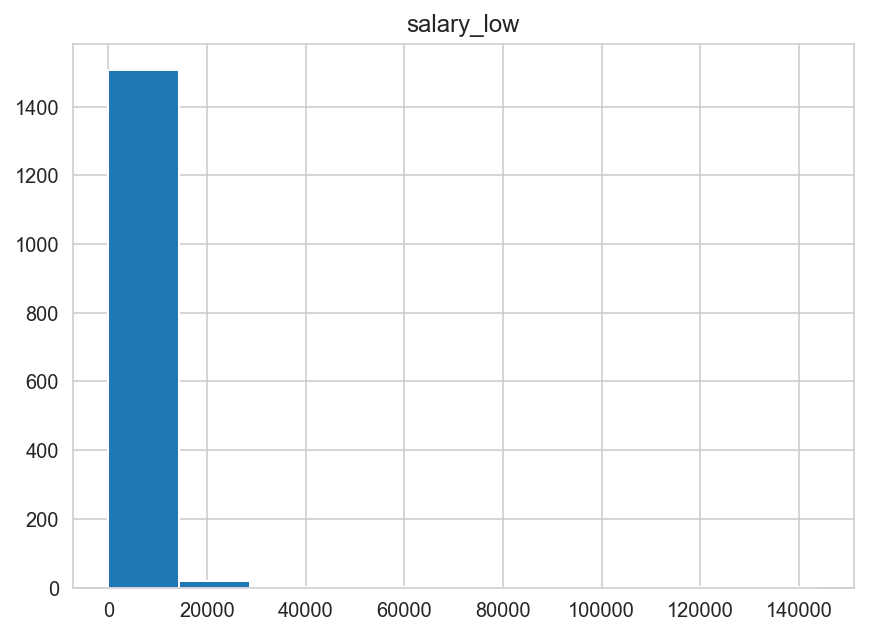

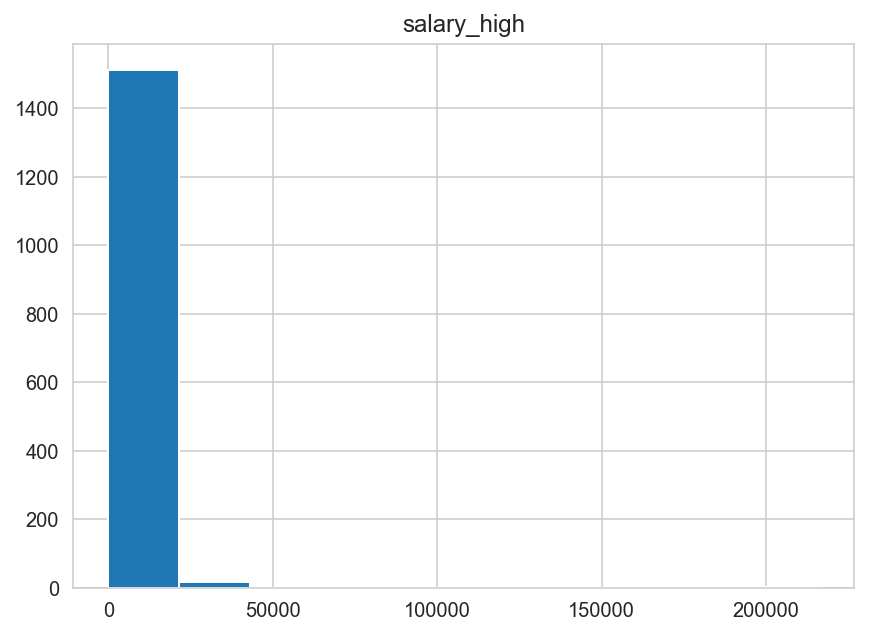

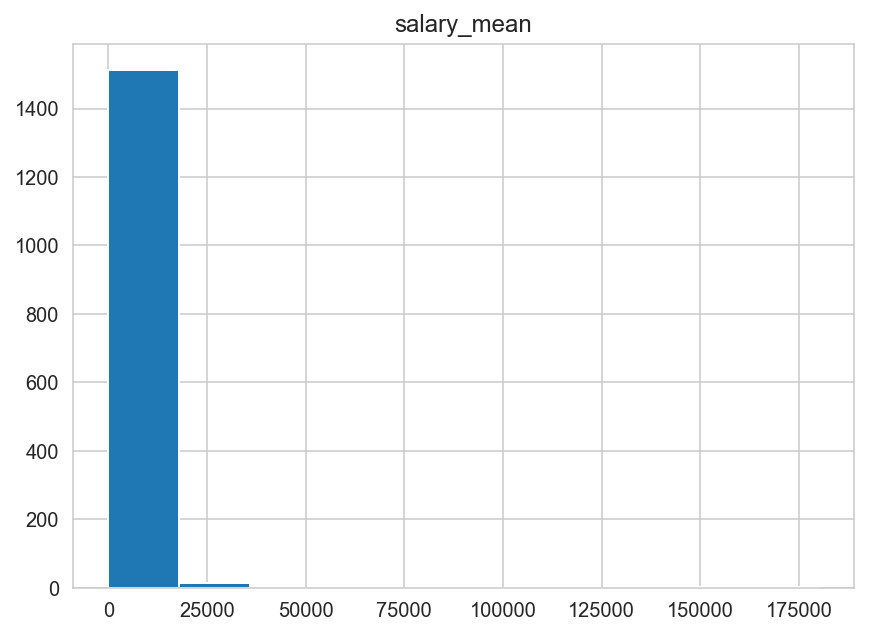

In [20]:
# Lets see the histograms for the salary numbers
num_cols = ['salary_low','salary_high','salary_mean']

for col in num_cols:
    plt.figure(figsize=(7,5))
    mcf_clean[col].hist()
    plt.title(col)

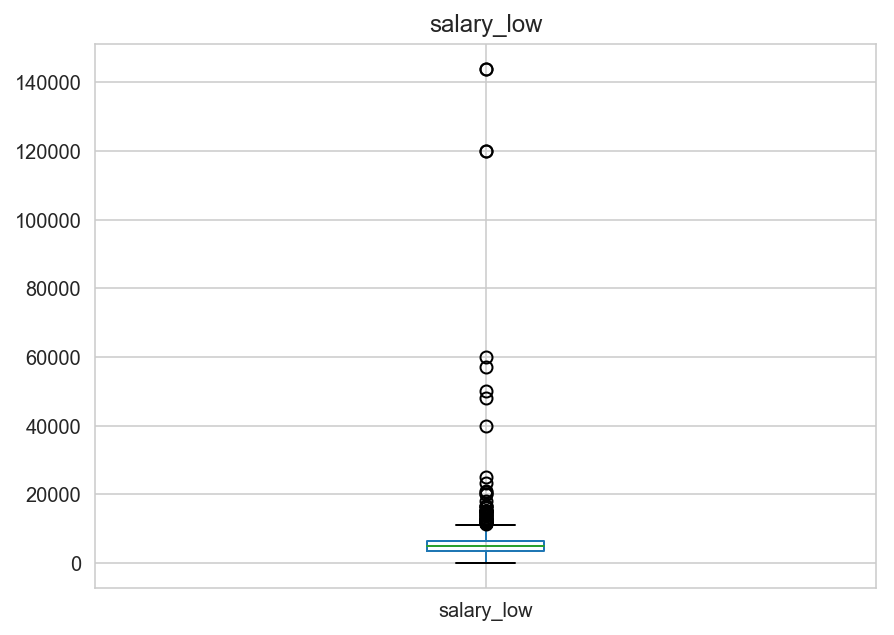

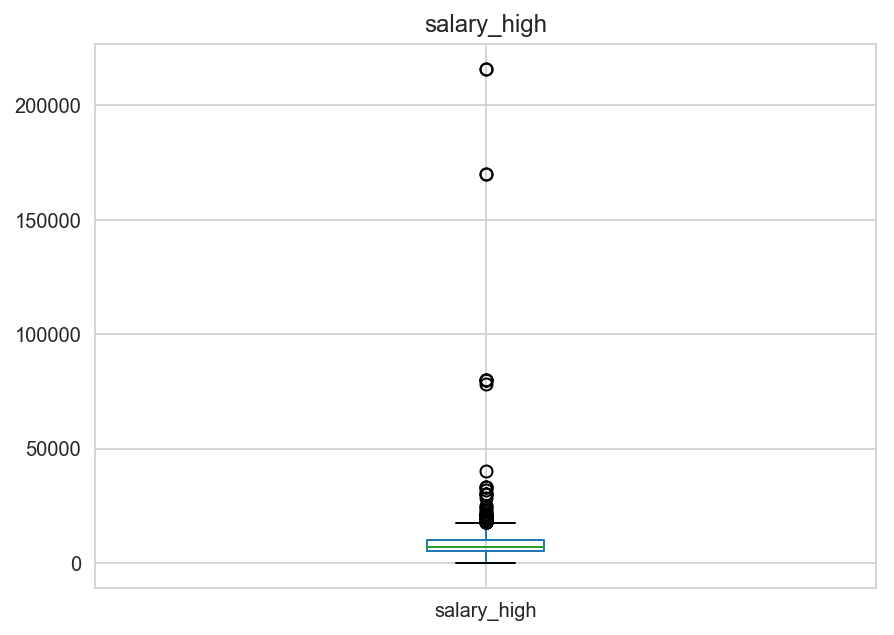

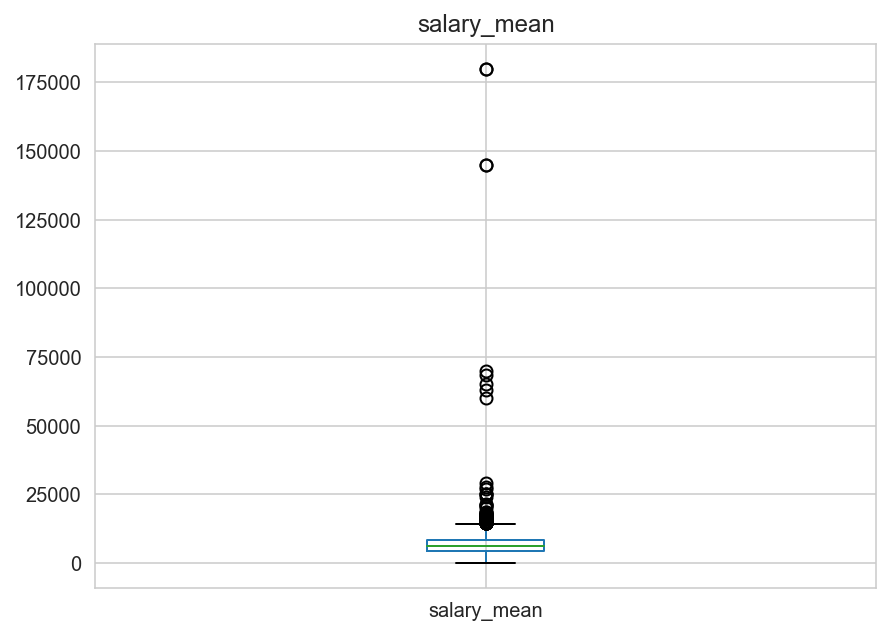

In [21]:
num_cols = ['salary_low','salary_high','salary_mean']

for col in num_cols:
    plt.figure(figsize=(7,5))
    mcf_clean[[col]].boxplot()
    plt.title(col)

**Making this a classification problem** 

We have the mean prices for each position. We can take the median as the threshold for determining whether the job has a high or low salary. 


In [22]:
# We will make the median salary the threshold
median = mcf_clean['salary_mean'].median()

mcf_clean['salary_mean'].describe()

count      1536.000000
mean       7334.052951
std        9360.355949
min           8.000000
25%        4287.500000
50%        6000.000000
75%        8250.000000
max      180000.000000
Name: salary_mean, dtype: float64

In [23]:
# Lets compare the jobs with low and high salary 
high_shape = mcf_clean[mcf_clean['salary_mean']>=median].shape
low_shape = mcf_clean[mcf_clean['salary_mean']<median].shape

print('high paying: ', high_shape)
print('low paying: ', low_shape)

high paying:  (859, 19)
low paying:  (677, 19)


In [24]:
mcf_clean['is_high_sal'] = mcf_clean['salary_mean'].apply(lambda x: 1 if x >= median else 0)

mcf_clean['is_high_sal'].head()


0    1
1    1
2    1
3    1
4    1
Name: is_high_sal, dtype: int64

In [25]:
# Lets make a bag of words model out of this column
mcf_clean['description'].head()

0    Roles & ResponsibilitiesWhy Work for Us We Pow...
1    Roles & ResponsibilitiesWhy Work for Us We Pow...
2    Roles & ResponsibilitiesWhat does a Data Direc...
3    Roles & ResponsibilitiesTransferTo operates a ...
4    Roles & ResponsibilitiesExperience in financia...
Name: description, dtype: object

**Count Vectorize to make bag of words**

In [26]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Define stopwords
stopwords = list(ENGLISH_STOP_WORDS)


In [27]:
# We want to apply count vectorizer on the descriptions column
cvec = CountVectorizer(stop_words=stopwords, max_df=0.9, min_df=0.1)
cvec.fit(mcf_clean['description'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=0.1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['never', 'ltd', 'hers', 'am', 'ever', 'formerly', 'ie', 'is', 'between', 'becoming', 'a', 'below', 'moreover', 'sincere', 'interest', 'from', 'thick', 'less', 'anyway', 'those', 'anyone', 'could', 'during', 'no', 'seem', 'namely', 'eg', 'as', 'nine', 'after', 'forty', 'own', 'part', 'it'...', 'former', 'fifty', 'any', 'show', 'upon', 'wherever', 'me', 'due', 'without', 'next', 'anything'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [28]:
# Define X
X = pd.DataFrame(cvec.transform(mcf_clean['description']).todense(), columns=cvec.get_feature_names())

In [29]:
# There are 1533 descriptions and 13678 possible words in those files
X.shape

(1536, 320)

In [30]:
# Each column is a word and the value is the number of times that the word appears in the file
X.iloc[:5, 200:210]

,perform,performance,plan,planning,plans,platform,platforms,player,plus,policies
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,2,0,1,1,0,0
3,0,1,0,0,0,5,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0


In [31]:
# Sum of each column, so the most common words amongst all files, top 10.
X.sum().sort_values(ascending=False).head(10)

experience      4865
business        3419
management      2725
team            2700
work            2653
skills          2462
requirements    1795
knowledge       1723
support         1723
development     1685
dtype: int64

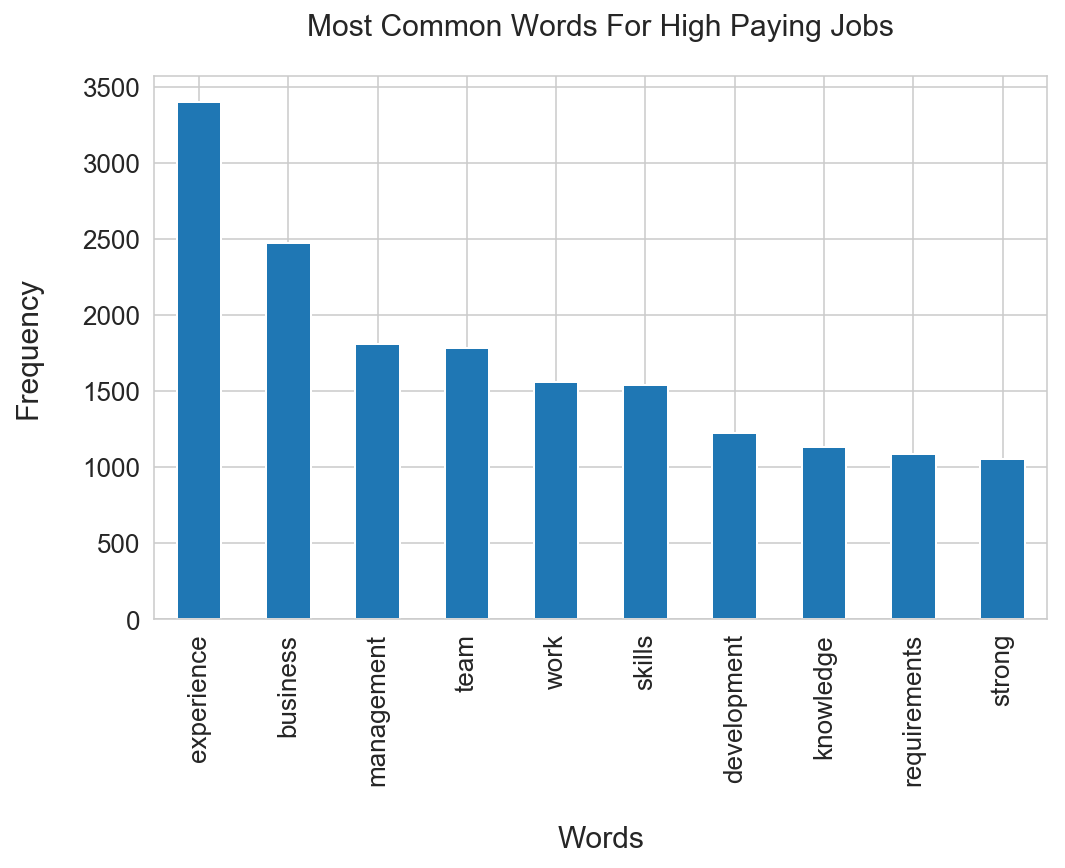

In [32]:
# Plot words in high paying jobs
high_pay = X[mcf_clean['is_high_sal']==1].sum(axis=0).sort_values(ascending=False).head(10)

high_pay.plot(kind='bar', figsize=(8,5))
plt.title('Most Common Words For High Paying Jobs', pad=20, fontsize=15)
plt.xlabel('Words', labelpad=20, fontsize=15)
plt.ylabel('Frequency', labelpad=20, fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

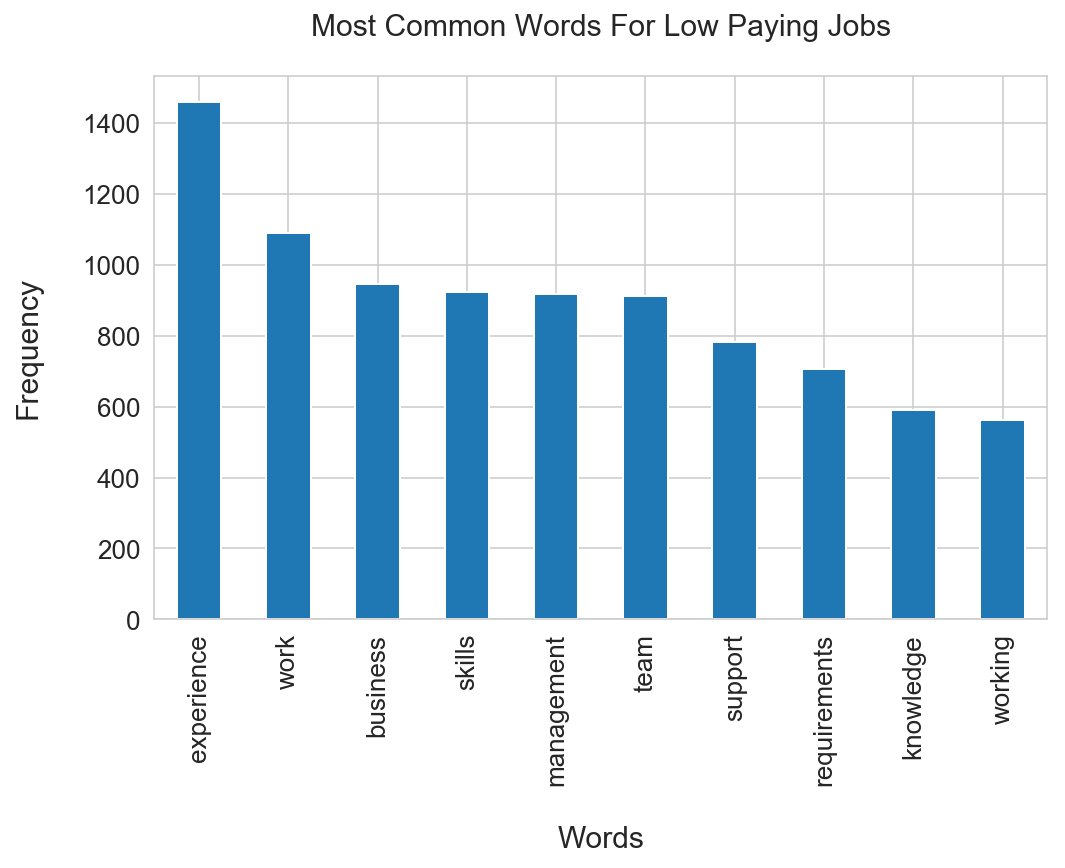

In [33]:
# Plot words in low paying jobs
low_pay = X[mcf_clean['is_high_sal']==0].sum(axis=0).sort_values(ascending=False).head(10)

low_pay.plot(kind='bar', figsize=(8,5))
plt.title('Most Common Words For Low Paying Jobs', pad=20, fontsize=15)
plt.xlabel('Words', labelpad=20, fontsize=15)
plt.ylabel('Frequency', labelpad=20, fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

## 1.3. Preprocessing (Regression)

In [34]:
mcf_clean.head(2)

,title,company,description,company_overview,location,role,hours,industry,applications,posted,closing,salary,salary_low,salary_high,salary_mean,is_data_title,is_data_desc,data_in_desc,data_in_ovrw,is_high_sal
0,Data Scientist,SINGAPORE POWER LIMITED,Roles & ResponsibilitiesWhy Work for Us We Pow...,SINGAPORE POWER LIMITED\nA leading energy util...,"SP GROUP BUILDING, 2 KALLANG SECTOR 349277",Professional,Full Time,Information Technology,4.0,28 Jan 2019,27 Feb 2019,4000-8000,4000.0,8000.0,6000.0,1,1,26,0,1
1,Senior Data Scientist,SINGAPORE POWER LIMITED,Roles & ResponsibilitiesWhy Work for Us We Pow...,SINGAPORE POWER LIMITED\nA leading energy util...,"SP GROUP BUILDING, 2 KALLANG SECTOR 349277",Middle Management,Full Time,Information Technology,0.0,28 Jan 2019,27 Feb 2019,8000-14000,8000.0,14000.0,11000.0,1,1,26,0,1


In [35]:
mcf = mcf_clean[['title',
                 'company',
                 'role',
                 'hours',
                 'industry',
                 'applications',
                 'salary_low',
                 'salary_high',
                 'salary_mean',
                 'is_data_title',
                 'is_data_desc',
                 'data_in_desc',
                 'data_in_ovrw']].copy()

for col in ['is_data_title','is_data_desc','data_in_desc','data_in_ovrw']:
    mcf[col] = mcf[col].astype('float64')


In [36]:
mcf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 13 columns):
title            1536 non-null object
company          1536 non-null object
role             1536 non-null object
hours            1536 non-null object
industry         1536 non-null object
applications     1536 non-null float64
salary_low       1536 non-null float64
salary_high      1536 non-null float64
salary_mean      1536 non-null float64
is_data_title    1536 non-null float64
is_data_desc     1536 non-null float64
data_in_desc     1536 non-null float64
data_in_ovrw     1536 non-null float64
dtypes: float64(8), object(5)
memory usage: 156.1+ KB


In [37]:
mcf_dummies = pd.get_dummies(mcf, drop_first=True)
mcf_dummies.head()

,applications,salary_low,salary_high,salary_mean,is_data_title,is_data_desc,data_in_desc,data_in_ovrw,"title_(IHPC) - Scientist , Industrial IOT Innovation",title_(Senior) Clinical Research Coordinator_Psychological Medicine_MB (Contract),...,industry_Real Estate / Property Management,"industry_Real Estate / Property Management, Sales / Retail",industry_Risk Management,"industry_Risk Management, Banking and Finance, Legal",industry_Sales / Retail,industry_Sciences / Laboratory / R&D,industry_Security and Investigation,industry_Social Services,industry_Telecommunications,industry_Travel / Tourism
0,4.0,4000.0,8000.0,6000.0,1.0,1.0,26.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,8000.0,14000.0,11000.0,1.0,1.0,26.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,8000.0,15000.0,11500.0,1.0,1.0,21.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,8000.0,11000.0,9500.0,1.0,1.0,24.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,6000.0,6500.0,6250.0,1.0,1.0,26.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# First, lets predict salary_mean

# Define X and y
drop_cols = ['salary_high','salary_low','salary_mean']

X = mcf_dummies[[col for col in mcf_dummies if col not in drop_cols]]
y = mcf_dummies['salary_mean']


In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Scale
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)


## 1.5. Regression

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression#, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Quick Linear Regression Model**

In [41]:
# Define a quick simply linear regression model
lr = LinearRegression()

# Cross validation score
cv_scores = cross_val_score(lr, Xs_train, y_train, cv=10)
cv_r2_mean = np.mean(cv_scores)
cv_r2_std = np.std(cv_scores)

# Fit model and score on test
lr.fit(Xs_train, y_train)
r2_train = lr.score(Xs_train, y_train)
r2_test = lr.score(Xs_test, y_test)

# Root mean squared error
y_train_pred = lr.predict(Xs_train)
y_test_pred = lr.predict(Xs_test)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


In [42]:
# Print results
print(lr)
print('cv_scores: ', cv_scores)
print('cv_r2_mean: ', cv_r2_mean)
print('cv_r2_std: ', cv_r2_std)
print('r2_train: ', r2_train)
print('r2_test: ', r2_test)
print('rmse_train: ', rmse_train)
print('rmse_test: ', rmse_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
cv_scores:  [-5.98000495e+28 -3.85742144e+27 -4.88732944e+25 -4.95223176e+28
 -6.60568591e+26 -4.67395755e+28 -1.89017329e+26 -1.86055713e+27
 -2.88526278e+28 -8.21898808e+27]
cv_r2_mean:  -1.9974999625678803e+28
cv_r2_std:  2.267582283696284e+28
r2_train:  0.876417984076496
r2_test:  -8.071827827865199e+26
rmse_train:  3135.931880557934
rmse_test:  2.927070292942296e+17


In [43]:
coef_dict = {'variable':X.columns, 'coef':lr.coef_}
    
# convert to df
coef_df = pd.DataFrame(coef_dict)

# make coefficients absolute values and sort in descending order
coef_df['abs_coef'] = abs(coef_df['coef'])
coef_df.sort_values(by='abs_coef', ascending=False, inplace=True)
coef_df

,variable,coef,abs_coef
159,title_Blockchain Researcher,2.144079e+17,2.144079e+17
139,title_Azure Big Data Developer,2.046929e+17,2.046929e+17
265,title_Data Centre Engineer,1.957943e+17,1.957943e+17
71,"title_Analyst, EDS & S",-1.699130e+17,1.699130e+17
194,title_Chief Information Officer / Chief Tech...,-1.357079e+17,1.357079e+17
109,title_Assistant Marketing Manager - Kipling,-1.354030e+17,1.354030e+17
520,title_Lead Consultant (Cloud and Infra Securit...,1.255164e+17,1.255164e+17
172,title_Business Intelligence Analyst Developer,-1.238563e+17,1.238563e+17
92,title_Assistant IT Manager,1.222166e+17,1.222166e+17
1887,"role_Senior Management, Manager, Professional",1.213670e+17,1.213670e+17


**Quick Random Forest Model**

In [44]:
# Define a quick model
rfr = RandomForestRegressor(n_estimators=50)

# Cross validation score
cv_scores = cross_val_score(rfr, Xs_train, y_train, cv=10)
cv_r2_mean = np.mean(cv_scores)
cv_r2_std = np.std(cv_scores)

# Fit model and score on test
rfr.fit(Xs_train, y_train)
r2_train = rfr.score(Xs_train, y_train)
r2_test = rfr.score(Xs_test, y_test)

# Root mean squared error
y_pred = rfr.predict(Xs_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


In [45]:
# Print results
print(rfr)
print('cv_scores: ', cv_scores)
print('cv_r2_mean: ', cv_r2_mean)
print('cv_r2_std: ', cv_r2_std)
print('r2_train: ', r2_train)
print('r2_test: ', r2_test)
print('rsme: ', rmse)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
cv_scores:  [ 0.12065154  0.33943592  0.86175351 -0.35517497  0.72242633  0.20446467
  0.10854069  0.49679639 -0.02717155  0.3740227 ]
cv_r2_mean:  0.28457452311583714
cv_r2_std:  0.3393582088074049
r2_train:  0.9709365844791932
r2_test:  0.6360244600034907
rsme:  6215.603558403301


**Gridsearch the best Random Forest Regressor**

In [46]:
# rfr_params = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100],
#     'max_features': [50, 100, 150],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300]
# }

# # Fit grid searcher to find best model
# rfr_gridsearcher = GridSearchCV(RandomForestRegressor(), param_grid=rfr_params, cv=5, verbose=1, iid=True)
# rfr_gridsearcher.fit(Xs_train, y_train)


In [47]:
# # Save model in pickle

# grd_rfr_name = 'rfr_grid.sav'
# pickle.dump(rfr_gridsearcher, open(grd_rfr_name, 'wb'))


In [48]:
# Load gridsearcher back
best_grd_rfr = pickle.load(open('rfr_grid.sav', 'rb'))
best_rfr = best_grd_rfr.best_estimator_
result = best_rfr.score(Xs_test, y_test)

print('best estimator:', best_rfr)
print('mean cv r^2:', best_grd_rfr.best_score_)
print('r^2 test:', result)

best estimator: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=100, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
mean cv r^2: 0.524875203409568
r^2 test: 0.6113846341156695


## 1.6. Classification - Bag-of-words Model (Description)

**Count Vectorize to make bag of words**

In [49]:
# We want to apply count vectorizer on the descriptions column
cvec = CountVectorizer(stop_words=stopwords, max_df=0.9, min_df=0.1)
cvec.fit(mcf_clean['description'])


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=0.1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['never', 'ltd', 'hers', 'am', 'ever', 'formerly', 'ie', 'is', 'between', 'becoming', 'a', 'below', 'moreover', 'sincere', 'interest', 'from', 'thick', 'less', 'anyway', 'those', 'anyone', 'could', 'during', 'no', 'seem', 'namely', 'eg', 'as', 'nine', 'after', 'forty', 'own', 'part', 'it'...', 'former', 'fifty', 'any', 'show', 'upon', 'wherever', 'me', 'due', 'without', 'next', 'anything'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [50]:
# Define X and y
X = pd.DataFrame(cvec.transform(mcf_clean['description']).todense(), columns=cvec.get_feature_names())
y = mcf_clean['is_high_sal']


In [51]:
# There are 1533 descriptions and 13678 possible words in those files
print('x shape:', X.shape)
print('y shape:', X.shape)

x shape: (1536, 320)
y shape: (1536, 320)


In [52]:
# Each column is a word and the value is the number of times that the word appears in the file
X.iloc[:5, 200:210]

,perform,performance,plan,planning,plans,platform,platforms,player,plus,policies
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,2,0,1,1,0,0
3,0,1,0,0,0,5,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0


In [53]:
# Sum of each column, so the most common words amongst all files, top 20.
X.sum().sort_values(ascending=False).head(20)

experience      4865
business        3419
management      2725
team            2700
work            2653
skills          2462
requirements    1795
knowledge       1723
support         1723
development     1685
strong          1542
working         1522
project         1500
ability         1479
design          1419
technical       1325
years           1323
analysis        1296
develop         1244
systems         1150
dtype: int64

In [54]:
print('Most Common Words For High Paying Jobs\n')
print(X[y==1].sum(axis=0).sort_values(ascending=False).head(10))

Most Common Words For High Paying Jobs

experience      3405
business        2474
management      1808
team            1787
work            1563
skills          1539
development     1227
knowledge       1132
requirements    1088
strong          1054
dtype: int64


In [55]:
print('Most Common Words For Low Paying Jobs\n')
print(X[y==0].sum(axis=0).sort_values(ascending=False).head(10))

Most Common Words For Low Paying Jobs

experience      1460
work            1090
business         945
skills           923
management       917
team             913
support          782
requirements     707
knowledge        591
working          561
dtype: int64


In [56]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [57]:
y_train

241     0
495     1
857     0
1250    0
1204    1
205     1
841     1
1004    1
572     0
940     0
275     0
1325    1
1335    1
986     0
1084    1
692     1
979     0
547     1
62      0
1370    0
1233    0
315     1
1165    1
1238    0
1342    0
1310    0
815     0
1439    1
1172    0
632     1
       ..
1502    1
753     0
1001    0
1239    1
580     1
562     1
398     1
668     0
1514    1
252     0
907     1
468     0
914     1
357     1
1278    1
1300    0
1202    1
1305    0
1414    1
508     1
749     1
129     1
144     0
960     1
847     1
715     1
905     0
1096    0
235     0
1061    1
Name: is_high_sal, Length: 1075, dtype: int64

**Quick Logistic Regression**

In [58]:
from sklearn.linear_model import LogisticRegression

# Logistic regression model
lr = LogisticRegression(solver='liblinear')
# Fit model
lr.fit(X_train, y_train)
# Score model
lr.score(X_test, y_test)

0.6832971800433839

In [59]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Get the predicted probability vector and explicitly name the columns.
lr_Y_pp = pd.DataFrame(lr.predict_proba(X_test), columns=['low_salary_pp', 'high_salary_pp'])

# For class 1, find the area under the curve.
fpr_1, tpr_1, _ = roc_curve(y_test, lr_Y_pp['high_salary_pp'])
lr_roc_auc = auc(fpr_1, tpr_1)

print('AUC: ', lr_roc_auc)

AUC:  0.7418427565200837


**A Quick Random Forest Classifier**

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Define a quick model
rfc = RandomForestClassifier(n_estimators=50)

# Cross validation score
cv_scores = cross_val_score(rfc, X_train, y_train, cv=10)
cv_acc_mean = np.mean(cv_scores)
cv_acc_std = np.std(cv_scores)

# Fit model and score on test
rfc.fit(X_train, y_train)
acc_train = rfc.score(X_train, y_train)
acc_test = rfc.score(X_test, y_test)


In [61]:
# Print results
print(rfc)
print('cv_scores: ', cv_scores)
print('cv_acc_mean: ', cv_acc_mean)
print('cv_acc_std: ', cv_acc_std)
print('acc_train: ', acc_train)
print('acc_test: ', acc_test)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
cv_scores:  [0.75229358 0.76851852 0.81481481 0.77777778 0.8411215  0.74766355
 0.77570093 0.72897196 0.72897196 0.71962617]
cv_acc_mean:  0.7655460763859118
cv_acc_std:  0.03698649292097547
acc_train:  0.9944186046511628
acc_test:  0.754880694143167


**Random Forest Classifier with Gridsearch**

In [62]:
# rfc_params = {
#     'bootstrap': [True],
#     'max_depth': [50, 60, 70],
#     'max_features': [140, 150, 160],
#     'min_samples_split': [6, 8, 10],
#     'n_estimators': [80, 100, 120]
# }

# # Fit grid searcher to find best model
# rfc_gridsearcher = GridSearchCV(RandomForestClassifier(), param_grid=rfc_params, cv=5, verbose=1, iid=True)
# rfc_gridsearcher.fit(X_train, y_train)


In [63]:
# # Save gridsearcher in pickle
# pickle.dump(rfc_gridsearcher, open('rfc_grid_1.sav', 'wb'))


In [64]:
# Load model back
rfc_grid_1 = pickle.load(open('rfc_grid_1.sav', 'rb'))


In [65]:
# Define best random forest classifier
rfc_1 = rfc_grid_1.best_estimator_

# Fit model and score on test
rfc_1.fit(X_train, y_train)
acc_train = rfc_1.score(X_train, y_train)
acc_test = rfc_1.score(X_test, y_test)

print('best estimator: ', rfc_1)
print('best cv accuracy: ', rfc_grid_1.best_score_)

print('accuracy on train: ', acc_train)
print('accuracy on test: ', acc_test)


best estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features=140, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
best cv accuracy:  0.7804651162790698
accuracy on train:  0.9813953488372092
accuracy on test:  0.7418655097613883


In [66]:
# Make predictions for confusion matrix
y_pred = rfc_1.predict(X_test)

conf_mat = pd.DataFrame(np.array(confusion_matrix(y_test, y_pred)),
                                index=['low_salary', 'high_salary'],
                                columns=['predicted_low_salary','predicted_high_salary'])
conf_mat

,predicted_low_salary,predicted_high_salary
low_salary,128,78
high_salary,41,214


In [67]:
# Get the predicted probability vector and explicitly name the columns.
rfc_Y_pp = pd.DataFrame(rfc_1.predict_proba(X_test), columns=['low_salary_pp', 'high_salary_pp'])

# For class 1, find the area under the curve.
fpr_2, tpr_2, _ = roc_curve(y_test, rfc_Y_pp['high_salary_pp'])
rfc_roc_auc = auc(fpr_2, tpr_2)

print('AUC: ', rfc_roc_auc)

AUC:  0.7981819912430991


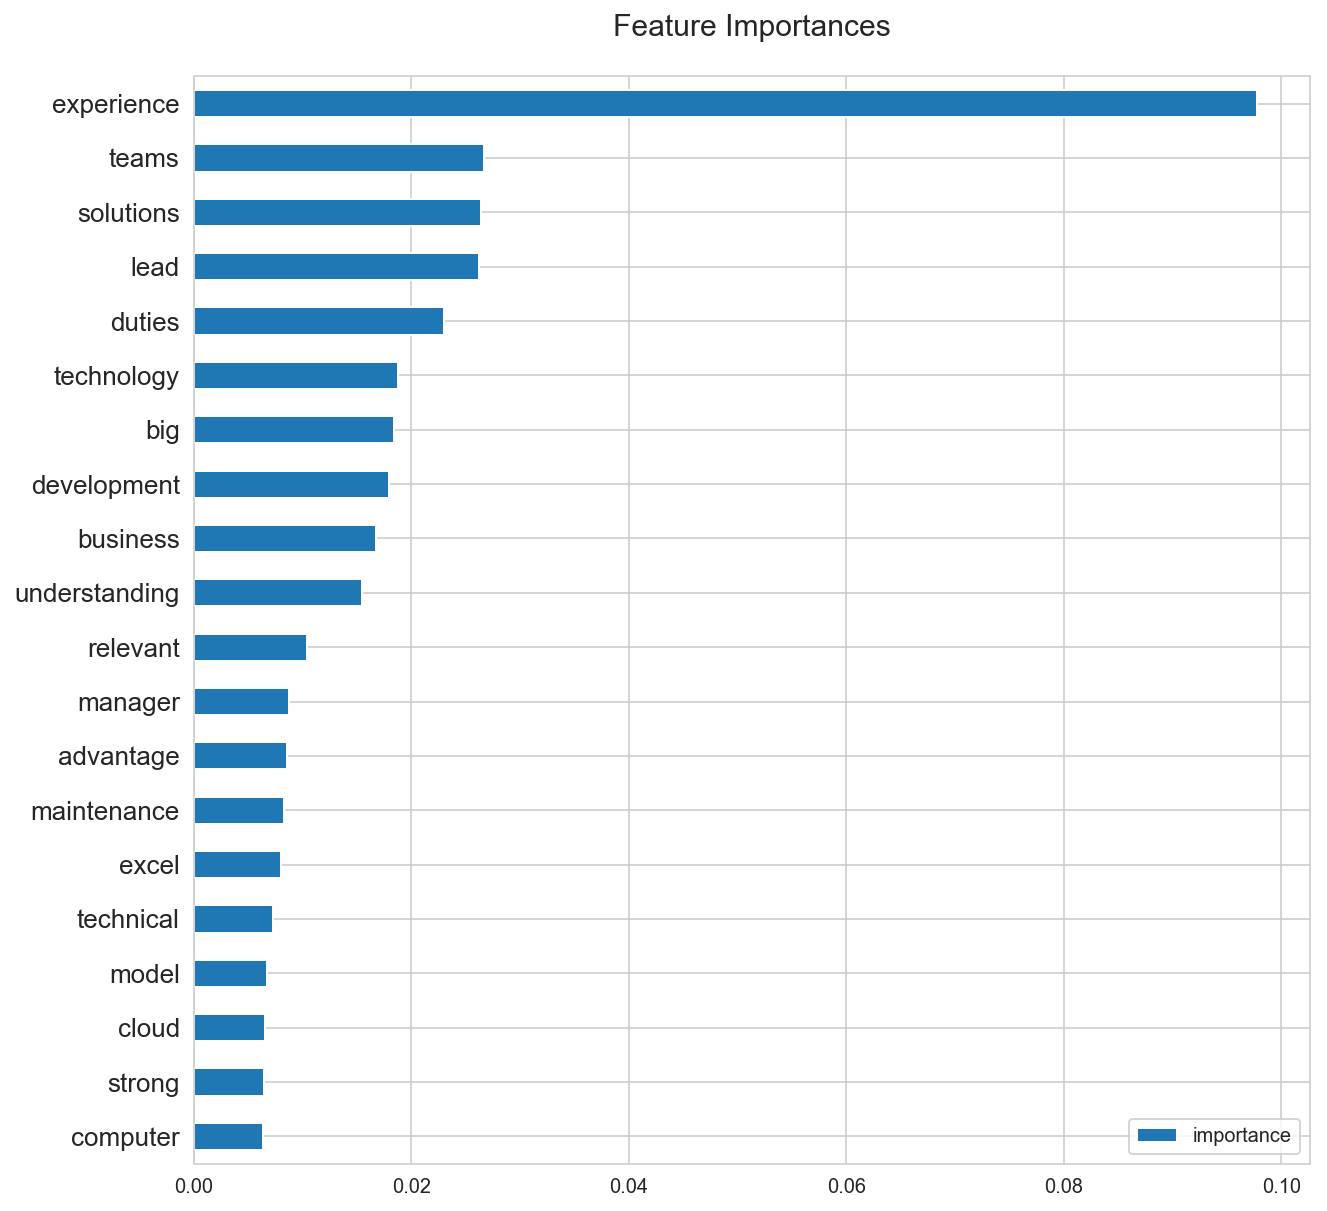

In [68]:
# Look at the feature importances
rfc_fi = pd.DataFrame({
        'feature':X_train.columns,
        'importance':rfc_1.feature_importances_
    })

rfc_fi.sort_values('importance', ascending=True, inplace=True)
rfc_fi = rfc_fi.tail(20)

rfc_fi.plot(kind='barh', figsize=(10,10))
plt.title('Feature Importances', pad=20, fontsize=15)
plt.yticks(range((len(rfc_fi))), rfc_fi['feature'], fontsize=13)
plt.show()

**Quick XGBoost**

In [69]:
import xgboost as xgb

In [70]:
# Define a quick model
xgb_classifier = xgb.XGBClassifier()

# Cross validation score
cv_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=10)
cv_acc_mean = np.mean(cv_scores)
cv_acc_std = np.std(cv_scores)

# Fit model and score on test
xgb_classifier.fit(X_train, y_train)
acc_train = xgb_classifier.score(X_train, y_train)
acc_test = xgb_classifier.score(X_test, y_test)

# Print results
print(xgb_classifier)
print('cv_scores: ', cv_scores)
print('cv_acc_mean: ', cv_acc_mean)
print('cv_acc_std: ', cv_acc_std)
print('acc_train: ', acc_train)
print('acc_test: ', acc_test)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
cv_scores:  [0.7706422  0.75       0.73148148 0.72222222 0.8411215  0.81308411
 0.76635514 0.74766355 0.79439252 0.71028037]
cv_acc_mean:  0.7647243101800247
cv_acc_std:  0.03934032843373962
acc_train:  0.9209302325581395
acc_test:  0.7310195227765727


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


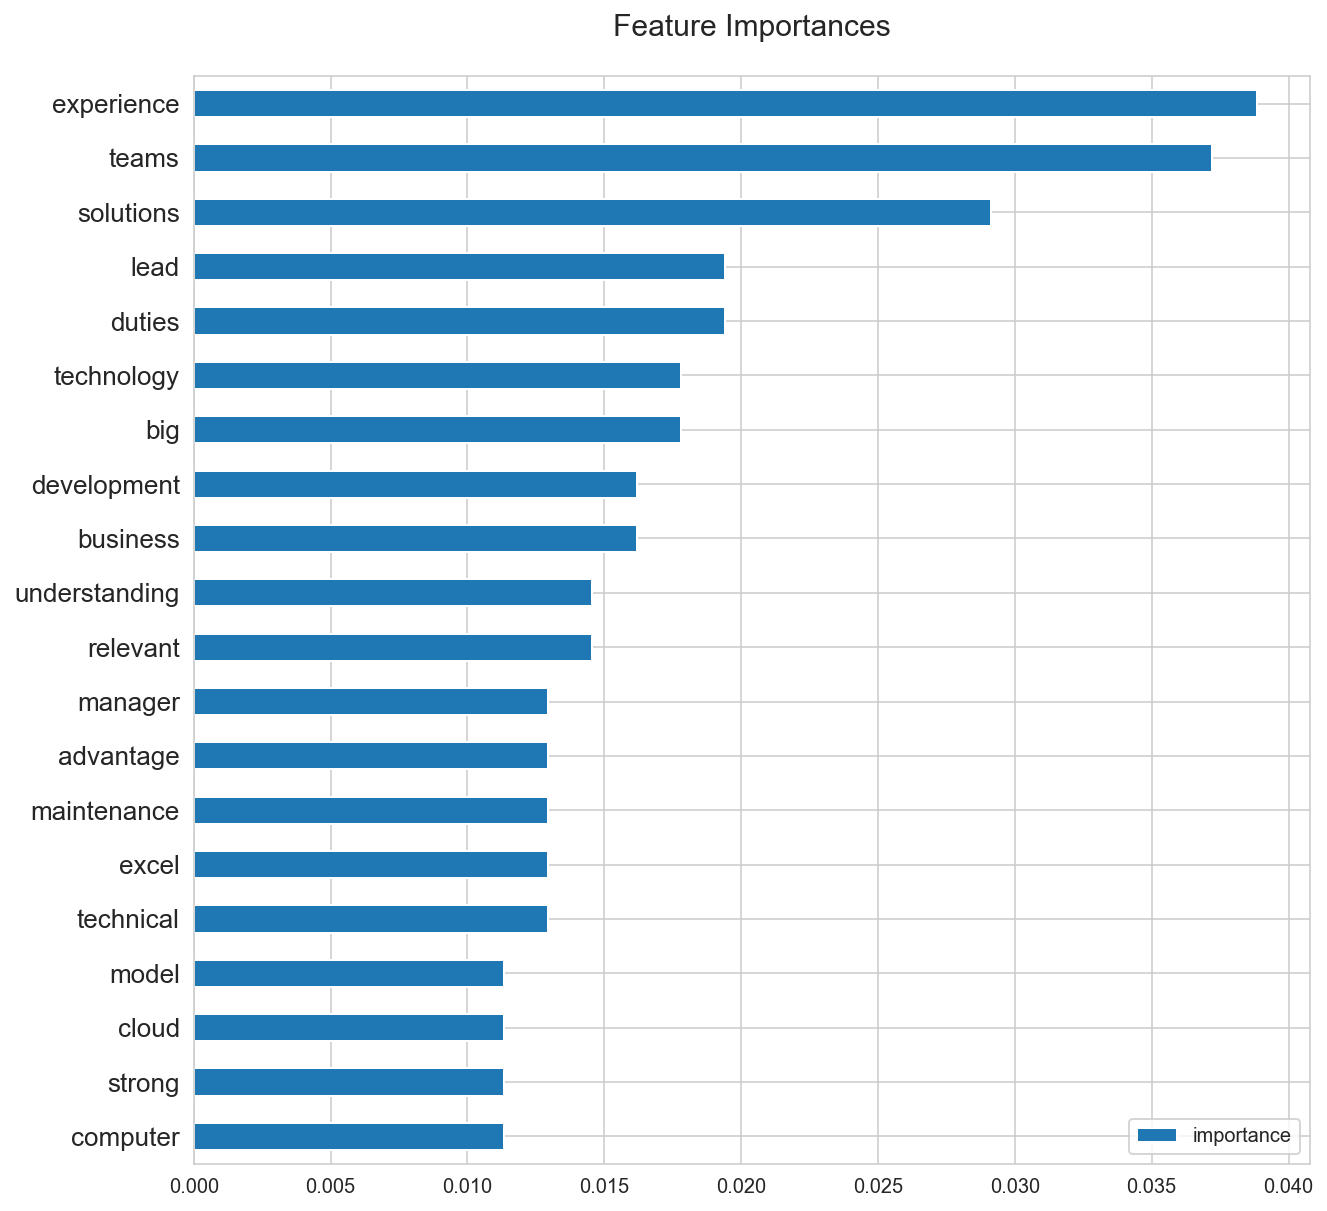

In [71]:
# Look at the feature importances
xgb_fi = pd.DataFrame({
        'feature':X_train.columns,
        'importance':xgb_classifier.feature_importances_
    })

xgb_fi.sort_values('importance', ascending=True, inplace=True)
xgb_fi = xgb_fi.tail(20)

xgb_fi.plot(kind='barh', figsize=(10,10))
plt.title('Feature Importances', pad=20, fontsize=15)
plt.yticks(range((len(rfc_fi))), rfc_fi['feature'], fontsize=13)
plt.show()

In [72]:
# Get the predicted probability vector and explicitly name the columns.
xgb_Y_pp = pd.DataFrame(xgb_classifier.predict_proba(X_test), columns=['low_salary_pp', 'high_salary_pp'])

# For class 1, find the area under the curve.
fpr_3, tpr_3, _ = roc_curve(y_test, xgb_Y_pp['high_salary_pp'])
xgb_roc_auc = auc(fpr_3, tpr_3)

print('AUC: ', xgb_roc_auc)

AUC:  0.7904054825813821


## 1.7. Conclusion

Random forest classifier with the job description is the best estimator for whether a job is high paying or low paying. Looking at feature importances, 'experience' is the strongest word that is indicative of a high paying job.

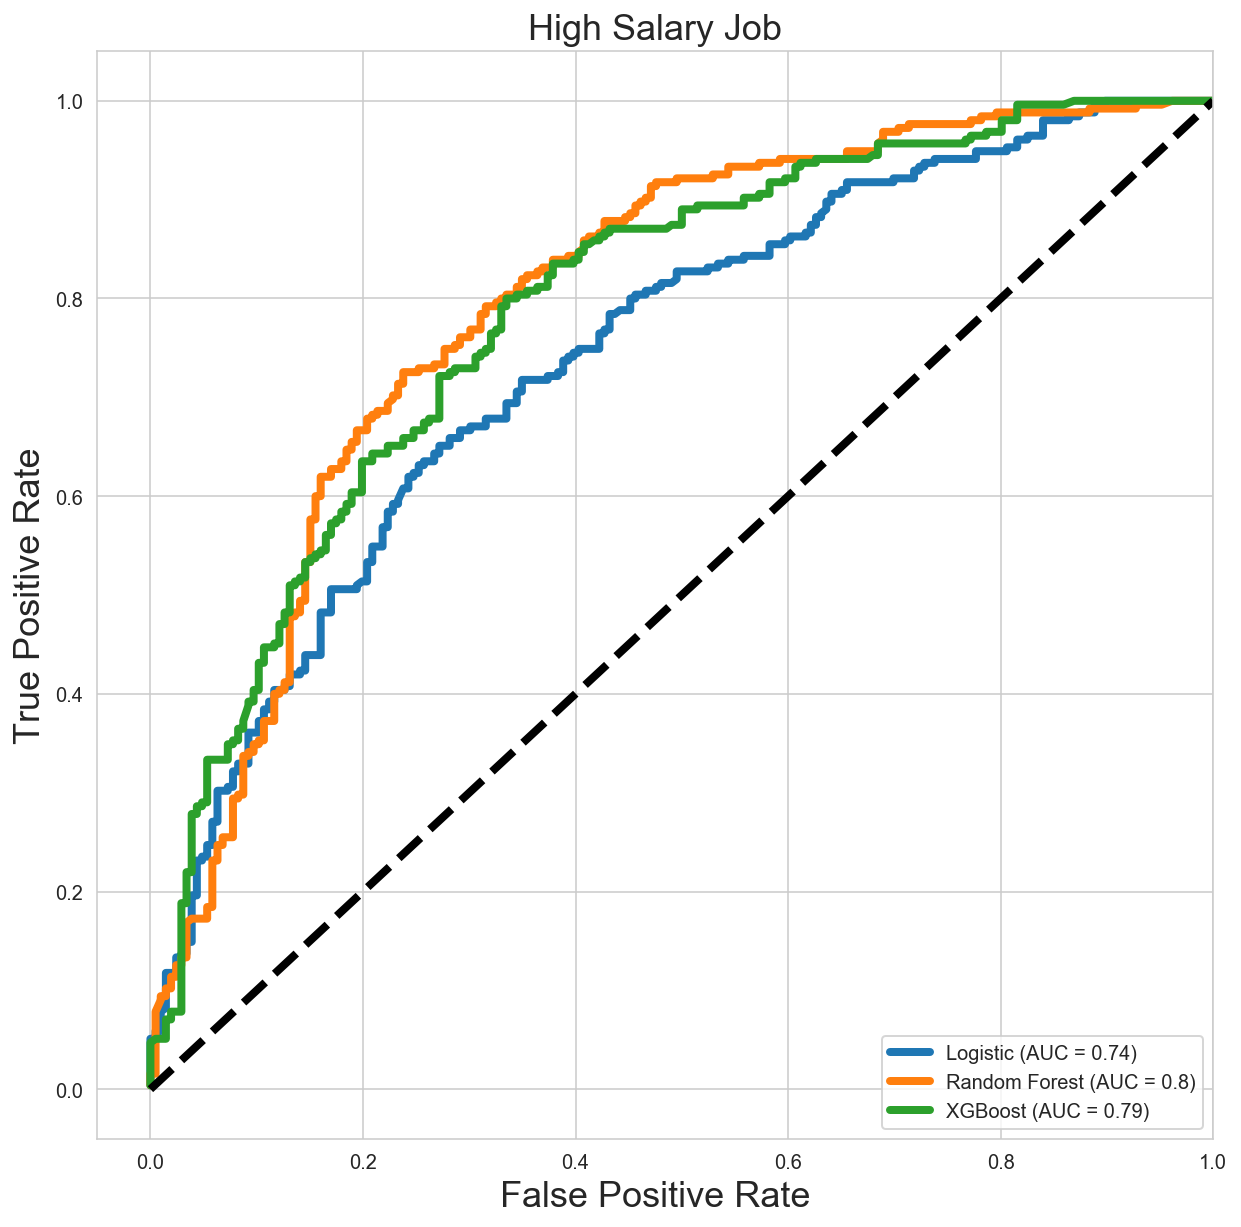

In [73]:
# Plot of a ROC curve for class 1 - high salary
plt.figure(figsize=(10,10))
plt.plot(fpr_1, tpr_1, label='Logistic (AUC = {})'.format(round(lr_roc_auc, 2)), linewidth=4)
plt.plot(fpr_2, tpr_2, label='Random Forest (AUC = {})'.format(round(rfc_roc_auc, 2)), linewidth=4)
plt.plot(fpr_3, tpr_3, label='XGBoost (AUC = {})'.format(round(xgb_roc_auc, 2)), linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('High Salary Job', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [74]:
interrupt

NameError: name 'interrupt' is not defined

**ANN (Not Working - kernel always dies)**

Tried using a quick neural net but kernel kept dying. Have a feeling that it has something to do with the input shape but could not figure it out in time. Any advice would be greatly appreciated.

In [75]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [76]:
print(X_train.shape)
print(y_train.shape)


(1075, 320)
(1075,)


In [ ]:
# # Normalize data
# X_train_ann = tf.keras.utils.normalize(X_train, axis=1)  # scales data between 0 and 1
# X_test_ann = tf.keras.utils.normalize(X_test, axis=1)  # scales data between 0 and 1


In [ ]:
# X_train_ann_2 = X_train_ann.values.reshape(1075,-1,1)
# # y_train_ann_2 = y_train.values.reshape(-1,1)
# X_test_ann_2 = X_test_ann.values.reshape(461,-1,1)
# # y_test_ann_2 = y_test.values.reshape(-1,1)

# print(X_train_ann_2.shape)
# # print(y_train_ann_2.shape)
# print(X_test_ann_2.shape)
# # print(y_test_ann_2.shape)


In [ ]:
# X_train_ann.shape


In [ ]:
# # Build model
# ann = Sequential()

# # Layer 1 - Dense layer with 50 nuerons, relu activation
# ann.add(Dense(units = 50, input_dim=320, kernel_initializer = 'uniform', activation='relu'))

# # Layer 2 - Dense layer with 50 nuerons, relu activation
# ann.add(Dense(units = 50, kernel_initializer = 'uniform', activation='relu'))

# # Output layer with activation function
# ann.add(Dense(units=1, kernel_initializer = 'uniform', activation='sigmoid'))

# # Compile model
# ann.compile(loss='binary_crossentropy',   # Loss function is binary crossentropy because output is cat or dog
#               optimizer='adam',           # Adam is an optimizer that is in place of stocastic gradient decent, complicated. But, it is still a way to optimize the loss function, i.e. reduce it
#               metrics=['accuracy'])       # Accuracy to be optimized


In [ ]:
# # Fit model
# ann.fit(X_train, y_train, epochs=3, batch_size=30, verbose=1)


In [ ]:
# # Score on test
# val_loss, val_acc = model.evaluate(X_test_ann_2, y_test_ann_2)
# print(val_loss)
# print(val_acc)


# QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

## 2.1. Topic Modeling with Job Descriptions

In [ ]:
mcf_clean['description'].sample(3)


In [ ]:
# Fit a count vectorizer on the descriptions columns
cvec = CountVectorizer(stop_words=stopwords)
X = cvec.fit_transform(mcf_clean['description'])

**LDA using scikit-learn's decomposition submodule**

In [ ]:
# Try first using scikit-learn's decomposition submodule
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=3)
lda.fit(X)

In [ ]:
word_frequencies = pd.DataFrame({i:lda.components_[i] for i in range(len(lda.components_))}, 
                                index=cvec.get_feature_names())
word_frequencies

In [ ]:
# Top words for topic 0
word_frequencies[0].sort_values(ascending=False).head(10)

# Topic 0: management 

In [ ]:
# Top words for topic 1
word_frequencies[1].sort_values(ascending=False).head(10)

# Topic 1: networks

In [ ]:
# Top words for topic 2
word_frequencies[2].sort_values(ascending=False).head(10)

# Topic 2: business/marketing

In [ ]:
# Top words for topic 3
word_frequencies[3].sort_values(ascending=False).head(10)

# Topic 3: analyst

In [ ]:
# Top words for topic 4
word_frequencies[4].sort_values(ascending=False).head(10)

# Topic 4: research

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(lda.transform(X)[:10], annot=True)
plt.yticks(range(0,10), mcf_clean['title'][:10], rotation=0, fontsize=13)
# plt.xticks(range(3), ['Technical','Business/Marketing','Financial/Accounting'], rotation=45, fontsize=13)
plt.show()

**LDA using GENSIM**

In [ ]:
from gensim import corpora, models, matutils

In [ ]:
# Create the vocab dictionary for GENSIM
vocab = {x: i for i, x in cvec.vocabulary_.items()}
vocab

In [ ]:
# Set up lda model
lda = models.LdaModel(
    matutils.Sparse2Corpus(X, documents_columns=False),
    num_topics  =  5,
    passes      =  20,
    id2word     =  vocab
)

In [ ]:
# Look at the topics - in this case we have only picked 3 topics
for topic in lda.print_topics(num_topics=5, num_words=10):
    print(topic)
    print('')

## 2.2. Topic Modelling with Job Roles

In [ ]:
mcf_clean['role'].value_counts()

In [ ]:
# Fit a count vectorizer on the descriptions columns
cvec = CountVectorizer(stop_words=stopwords)
X = cvec.fit_transform(mcf_clean['role'])

**LDA using scikit-learn's decomposition submodule**

In [ ]:
# Try first using scikit-learn's decomposition submodule
lda = LatentDirichletAllocation(n_components=3, random_state=1)
lda.fit(X)

In [ ]:
word_frequencies = pd.DataFrame({i:lda.components_[i] for i in range(len(lda.components_))}, 
                                index=cvec.get_feature_names())
word_frequencies

In [ ]:
# Top words for topic 0
word_frequencies[0].sort_values(ascending=False).head(10)

# Topic 0 can be technical data roles

In [ ]:
# Top words for topic 1
word_frequencies[1].sort_values(ascending=False).head(10)

# Topic 1 can be more business and marketing related roles

In [ ]:
# Top words for topic 2
word_frequencies[2].sort_values(ascending=False).head(10)

# Topic 2 can be more finance/accounting roles

In [ ]:
# # Top words for topic 3
# word_frequencies[3].sort_values(ascending=False).head(10)

# # Topic 3 can be more XXXX roles

In [ ]:
# # Top words for topic 4
# word_frequencies[4].sort_values(ascending=False).head(10)

# # Topic 4 can be more XXXX roles

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(lda.transform(X)[:10], annot=True)
plt.yticks(range(0,10), mcf_clean['role'][:10], rotation=0, fontsize=13)
# plt.xticks(range(3), ['Technical','Business/Marketing','Financial/Accounting'], rotation=45, fontsize=13)
plt.show()

**LDA using GENSIM**

In [ ]:
# Create the vocab dictionary for GENSIM
vocab = {x: i for i, x in cvec.vocabulary_.items()}
vocab

In [ ]:
# Set up lda model
lda = models.LdaModel(
    matutils.Sparse2Corpus(X, documents_columns=False),
    num_topics  =  3,
    passes      =  20,
    id2word     =  vocab
)

In [ ]:
# Look at the topics - in this case we have only picked 3 topics
for topic in lda.print_topics(num_topics=5, num_words=10):
    print(topic)
    print('')

## 2.3. Modeling

**Seniority as a Target**

In [ ]:
mcf_clean['role'] = mcf_clean['role'].apply(lambda x: x.replace(',',''))
mcf_clean['role'].value_counts()

In [ ]:
# Make classes for seniority
s_list = []
for seniority in mcf_clean['role']:  
    
    # 2 class for management positions
    if 'senior management' in seniority.lower(): 
        s_list += [2]
    elif 'middle management' in seniority.lower(): 
        s_list += [2]
    elif 'manager' in seniority.lower(): 
        s_list += [2]
    
    # 1 class for mid level positions
    elif 'senior executive' in seniority.lower(): 
        s_list += [1]
    elif 'executive' in seniority.lower(): 
        s_list += [1]
    elif 'none' in seniority.lower(): 
        s_list += [1]
    
    # 0 class for entry level positions
    elif 'professional' in seniority.lower(): 
        s_list += [0]    
    elif 'fresh/entry level' in seniority.lower(): 
        s_list += [0]
    elif 'non-executive' in seniority.lower(): 
        s_list += [0]

# Make new column
mcf_clean['seniority'] = s_list

In [ ]:
mcf_clean['seniority'].value_counts()

**Defining New Target**

In [ ]:
# We want to apply count vectorizer on the descriptions column
cvec = CountVectorizer(stop_words=stopwords, max_df=0.9, min_df=0.1)
cvec.fit(mcf_clean['description'])

In [ ]:
# Define X and y
X = pd.DataFrame(cvec.transform(mcf_clean['description']).todense(), columns=cvec.get_feature_names())
y_2 = mcf_clean['seniority']

In [ ]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_2, test_size=0.3, random_state=1, stratify=y_2)

In [ ]:
print('Most Common Words Management Jobs - Class 3\n')
print(X[y_2==2].sum(axis=0).sort_values(ascending=False).head(10))

In [ ]:
print('Most Common Words Executive Jobs - Class 2\n')
print(X[y_2==1].sum(axis=0).sort_values(ascending=False).head(10))

In [ ]:
print('Most Common Words Entry Level Jobs - Class 1\n')
print(X[y_2==0].sum(axis=0).sort_values(ascending=False).head(10))

**Quick Logistic Regression**

In [ ]:
# Logistic regression model
lr = LogisticRegression(solver='liblinear')
# Fit model
lr.fit(X_train, y_train)
# Score model
lr.score(X_test, y_test)

In [ ]:
# Make predictions for confusion matrix
y_pred = lr.predict(X_test)

conf_mat = pd.DataFrame(np.array(confusion_matrix(y_test, y_pred)),
                                index=['entry','executive','management'],
                                columns=['pred_entry','pred_executive','pred_management'])
conf_mat

**A Quick Random Forest Classifier**

In [ ]:
# Define a quick model
rfc = RandomForestClassifier(n_estimators=50)

# Cross validation score
cv_scores = cross_val_score(rfc, X_train, y_train, cv=10)
cv_acc_mean = np.mean(cv_scores)
cv_acc_std = np.std(cv_scores)

# Fit model and score on test
rfc.fit(X_train, y_train)
acc_train = rfc.score(X_train, y_train)
acc_test = rfc.score(X_test, y_test)

In [ ]:
# Print results
print(rfc)
print('cv_scores: ', cv_scores)
print('cv_acc_mean: ', cv_acc_mean)
print('cv_acc_std: ', cv_acc_std)
print('acc_train: ', acc_train)
print('acc_test: ', acc_test)

In [ ]:
# Make predictions for confusion matrix
y_pred = rfc.predict(X_test)

conf_mat = pd.DataFrame(np.array(confusion_matrix(y_test, y_pred)),
                                index=['entry','executive','management'],
                                columns=['pred_entry','pred_executive','pred_management'])
conf_mat

**Random Forest Classifier with Gridsearch**

In [ ]:
# rfc_params = {
#     'bootstrap': [True],
#     'max_depth': [50, 60, 70, 80],
#     'max_features': [140, 150, 160, 170],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [80, 100, 120]
# }

# # Fit grid searcher to find best model
# rfc_gridsearcher_2 = GridSearchCV(RandomForestClassifier(), param_grid=rfc_params, cv=5, verbose=1, iid=True)
# rfc_gridsearcher_2.fit(X_train, y_train)

In [ ]:
# # Save gridsearcher in pickle
# pickle.dump(rfc_gridsearcher_2, open('rfc_grid_2.sav', 'wb'))

In [ ]:
# Load model back
rfc_grid_2 = pickle.load(open('rfc_grid_2.sav', 'rb'))

In [ ]:
# Define best random forest classifier
rfc_2 = rfc_grid_2.best_estimator_

# Fit model and score on test
rfc_2.fit(X_train, y_train)
acc_train = rfc_2.score(X_train, y_train)
acc_test = rfc_2.score(X_test, y_test)

print('best estimator: ', rfc_2)
print('best cv accuracy: ', rfc_grid_2.best_score_)

print('accuracy on train: ', acc_train)
print('accuracy on test: ', acc_test)

In [ ]:
# Make predictions for confusion matrix
y_pred = rfc_2.predict(X_test)

conf_mat = pd.DataFrame(np.array(confusion_matrix(y_test, y_pred)),
                                index=['entry','executive','management'],
                                columns=['pred_entry','pred_executive','pred_management'])
conf_mat

In [ ]:
# Look at the feature importances
rfc_fi = pd.DataFrame({
        'feature':X_train.columns,
        'importance':rfc_2.feature_importances_
    })

rfc_fi.sort_values('importance', ascending=True, inplace=True)
rfc_fi = rfc_fi.tail(20)

rfc_fi.plot(kind='barh', figsize=(10,10))
plt.title('Feature Importances', pad=20, fontsize=15)
plt.yticks(range((len(rfc_fi))), rfc_fi['feature'], fontsize=13)
plt.show()

## 2.4. Conclusion

Random forest is our best predictor. 